# Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

# importing libraries

In [62]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# importing libraries for avoid warnings

import warnings
warnings.filterwarnings("ignore")

# calling the dataset

In [63]:
# calling the dataset through excel 

df = pd.read_excel("Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [64]:
# calling anotheer dataset

dfa = pd.read_excel("Test_set.xlsx")
dfa.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# Data_train Dataset

# EDA

In [65]:
# checking the shape of data_train_dataset

df.shape

(10683, 11)

In [66]:
# checking the columns name

df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [67]:
# checking the types of columns of dataset

df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

here we can see all columns are object , only one is integer

In [68]:
# checkinh the information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


we get the size and the types of columns of each data

In [69]:
# checking the uniqueness of columns 

df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

above all the showing value of each columns

In [70]:
# checking the values in columns of dataset if there is unexpected and unwanted entries

for i in df.columns:
    print(df[i].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156


In [71]:
# chwecking null values 

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

only two columns dep_time, and additional_info are having null values

# Imputation technique to remove the null values:

In [72]:
# removing the null values

df["Route"] = df["Route"].fillna(df["Route"].mode()[0])
df["Total_Stops"] = df["Total_Stops"].fillna(df["Total_Stops"].mode()[0])

In [73]:
# now recheck after removing null values

df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [74]:
#Checking unique values of target column

df['Price'].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

# Feature extraction 

In [75]:
#Converting object data type to datetime 

df['Date_of_Journey'] =  pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] =  pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] =  pd.to_datetime(df['Arrival_Time'])

In [76]:
#Checking the data types of all columns again

df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

here we can see the date of journey and the dep_time, 
and arrival time has been changed

In [77]:
#Extracting journey year,month and day from Date_of_journey

#Extracting year
df["Journey_Year"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.year

#Extracting month
df["Journey_Month"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.month

#Extracting day
df["Journey_Day"]=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [78]:
df = df.drop(["Date_of_Journey"],axis=1)

In [79]:
#Extracting Duration column using Arrival_Time and Dep_Time

Difference = (df["Arrival_Time"]-df["Dep_Time"])
Difference_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600
    Difference_list.append(duration)
df["Duration"] = Difference_list

In [80]:
#Extracting hours and minutes from Dep_time

#Extracting Hours
df["Dep_Hour"]=pd.to_datetime(df["Dep_Time"]).dt.hour

#Extracting Hours
df["Dep_Min"]=pd.to_datetime(df["Dep_Time"]).dt.minute

In [81]:
#Droping Dep_Time column after extraction
df = df.drop(["Dep_Time"],axis=1)

In [82]:
#Extracting hours and minutes from Arrival_Time

#Extracting Hours
df["Arrival_Hour"]=pd.to_datetime(df["Arrival_Time"]).dt.hour

#Extracting Hours
df["Arrival_Min"]=pd.to_datetime(df["Arrival_Time"]).dt.minute

In [83]:
#Droping Arrival_Time column after extraction
df = df.drop(["Arrival_Time"],axis=1)

In [84]:
# take a view of dataset after extracting the come data

df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2.833333,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7.416667,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19.000000,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5.416667,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4.750000,1 stop,No info,13302,2019,1,3,16,50,21,35


In [85]:
# checking for categorical columns

categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [86]:
# Now checking for numerical columns

numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Duration', 'Price', 'Journey_Year', 'Journey_Month', 'Journey_Day', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


# Visualization

# univariets analysis for numerical columns

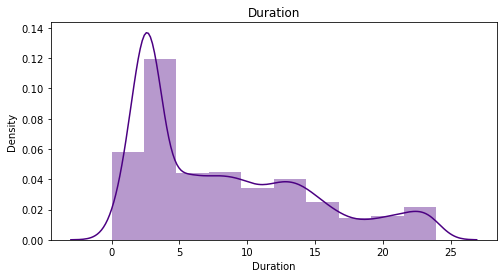

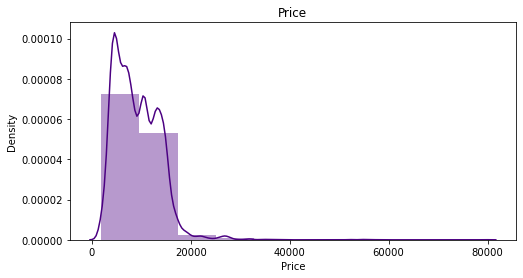

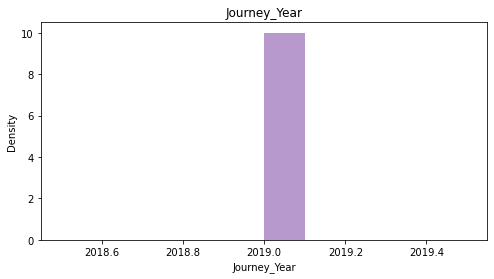

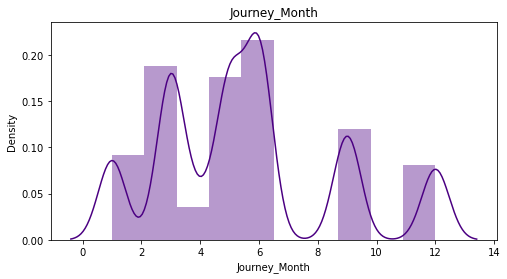

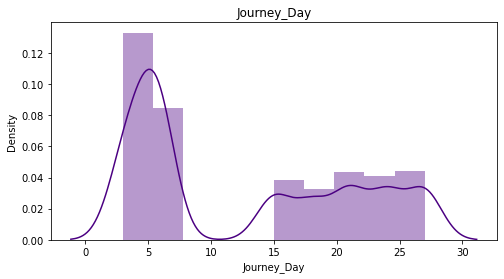

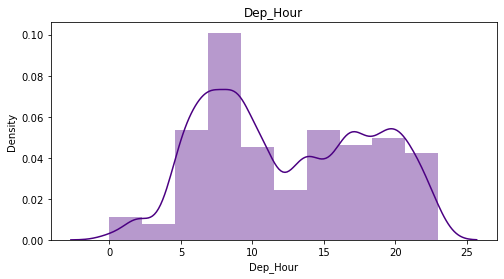

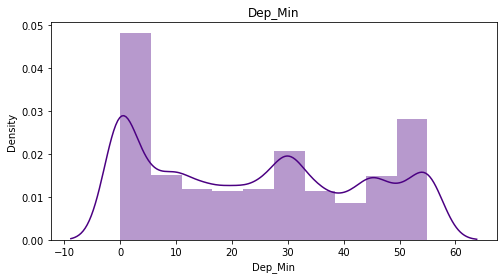

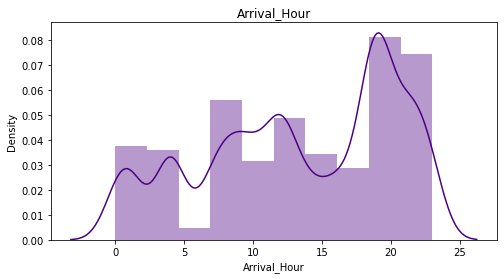

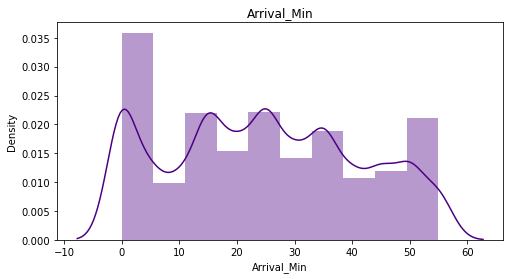

In [87]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="indigo")
    plt.title(i)
    plt.show()

# univariate analysis for categorical columns:

In [88]:
#Checking the value counts of Airline column
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

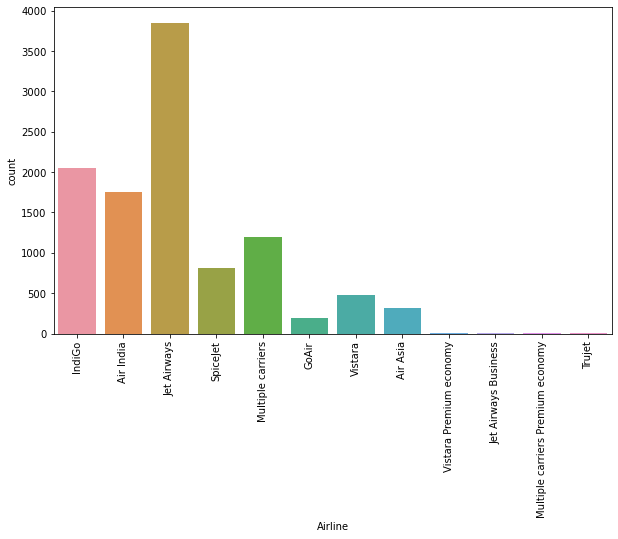

In [89]:
#Count plot for Airline column
plt.figure(figsize=[10,6])
sns.countplot(df['Airline'])
plt.xticks(rotation=90);

Jet Airways has maximum conut which means most of the passengers prefered Jet Airways for there travelling in the year 2019.
Trujet and GoAir has very less count which means only few poeple opted this airlines for there travelling in 2019.

In [90]:
#Checking the value counts of Source column
df.Source.value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

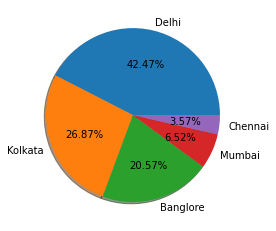

In [91]:
#Ploting pie chart for Source column
labels='Delhi','Kolkata','Banglore','Mumbai','Chennai'
fig, ax = plt.subplots()
ax.pie(df['Source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()


In [92]:
#Checking the value counts of Destination column
df.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [94]:
#Checking the value counts of Route column

df.Route.value_counts()

DEL → BOM → COK                2377
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BLR → HBX → BOM → AMD → DEL       1
BOM → JDH → JAI → DEL → HYD       1
BOM → NDC → HYD                   1
CCU → IXZ → MAA → BLR             1
BLR → BOM → IXC → DEL             1
Name: Route, Length: 128, dtype: int64

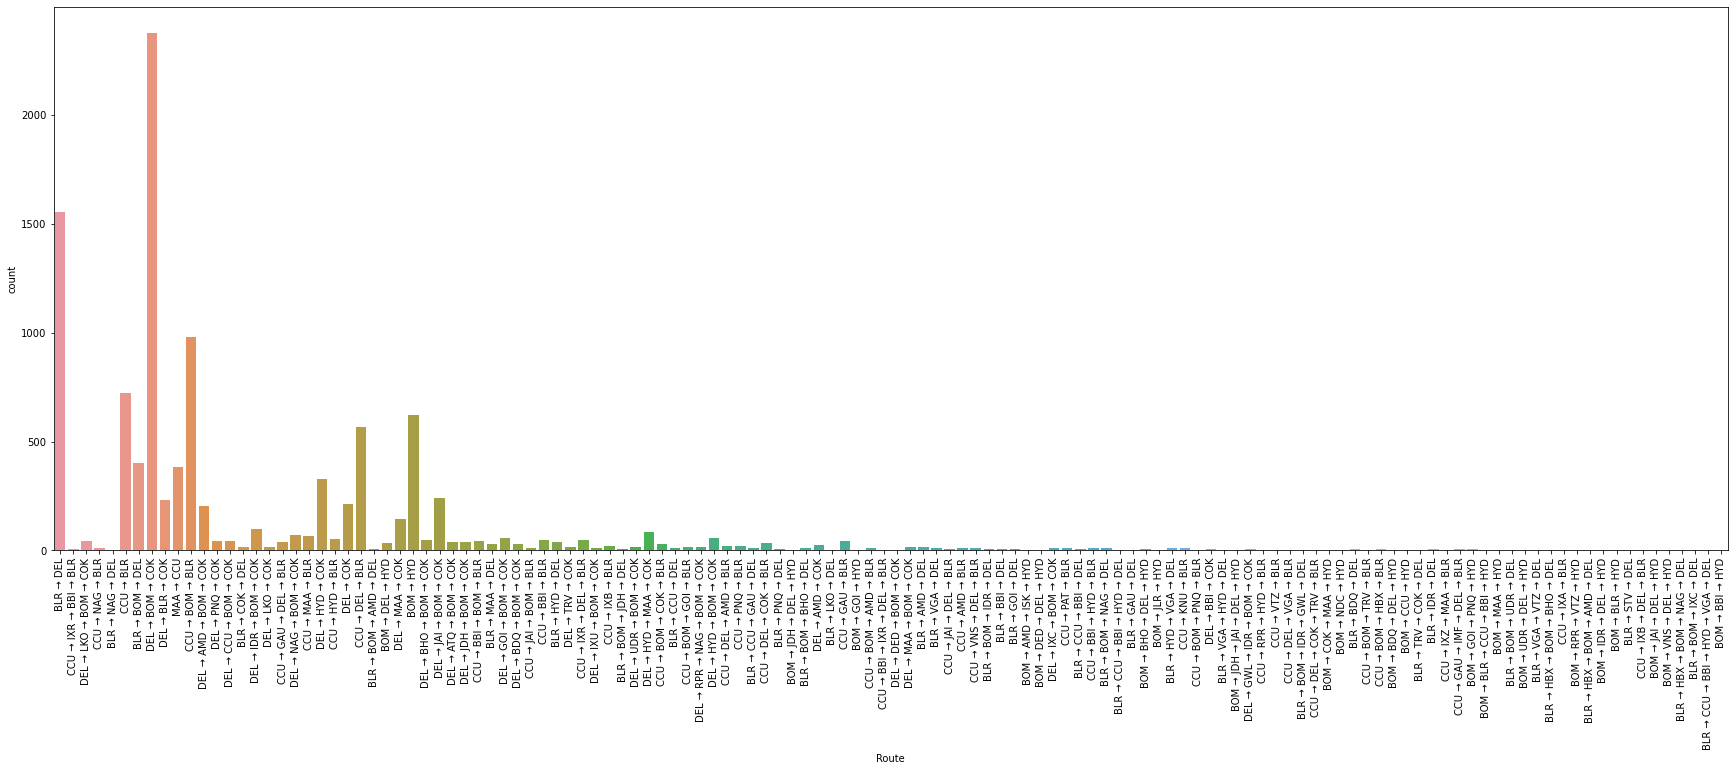

In [95]:
#Count plot for Route column
plt.figure(figsize=[30,10])
sns.countplot(df['Route'])
plt.xticks(rotation=90);

In [96]:
#Checking the value counts of Additional_Info column
df.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

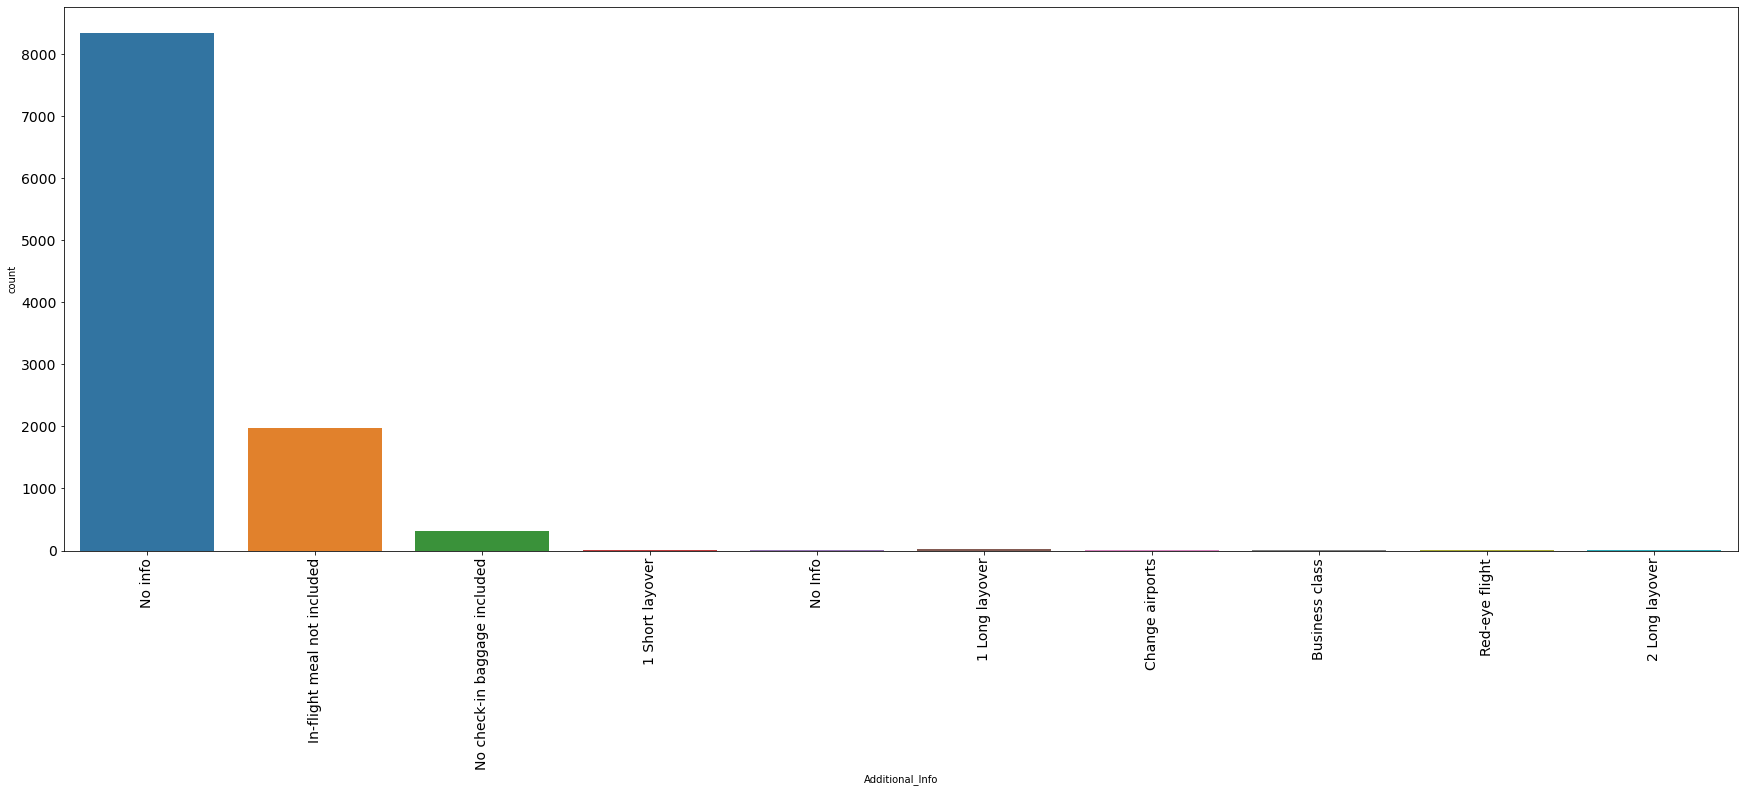

In [97]:
#Count plot for Additional_Info column
plt.figure(figsize=[30,10])
sns.countplot(df['Additional_Info'])
plt.xticks(rotation=90,fontsize=14)
plt.yticks(rotation=0,fontsize=14);

In most of the flights Additional Info is No Info.

# Bivariate analysis 

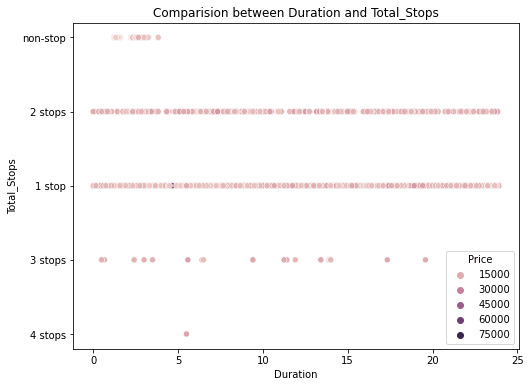

In [98]:
#Comparision between features using scatter plot

plt.figure(figsize=[8,6])
plt.title('Comparision between Duration and Total_Stops')
sns.scatterplot(df['Duration'],df['Total_Stops'],hue=df['Price']);

Irrespective of Duration 1 and 2 Stops are more in count.So All the maximum airlines have maximum 1 or 2 stops.

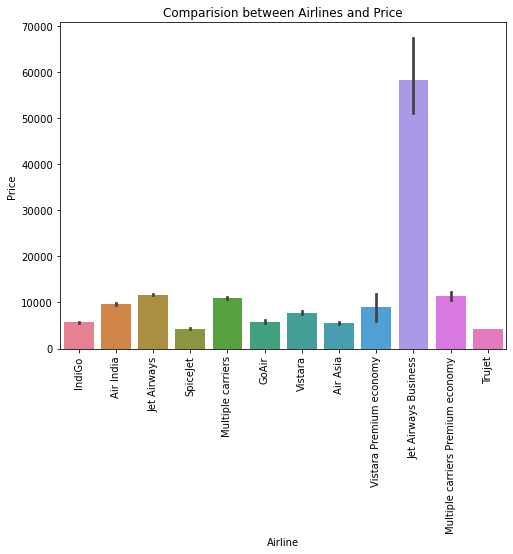

In [99]:
#Comparision between features using box plot

plt.figure(figsize=[8,6])
plt.title('Comparision between Airlines and Price')
sns.barplot(df['Airline'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()


jet airways is vary costly as compare to any other airline

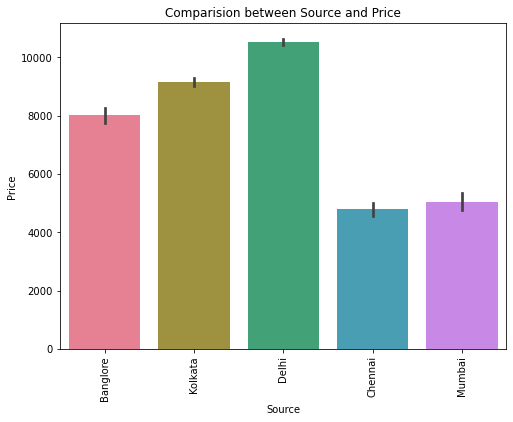

In [100]:
#Comparision between features using box plot

plt.figure(figsize=[8,6])
plt.title('Comparision between Source and Price')
sns.barplot(df['Source'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

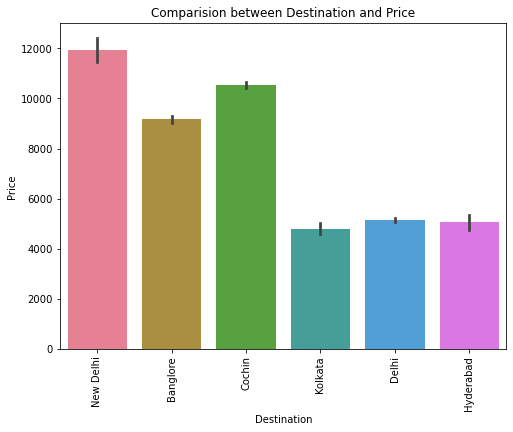

In [101]:
#Comparision between features using box plot

plt.figure(figsize=[8,6])
plt.title('Comparision between Destination and Price')
sns.barplot(df['Destination'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

new delhi has very high value

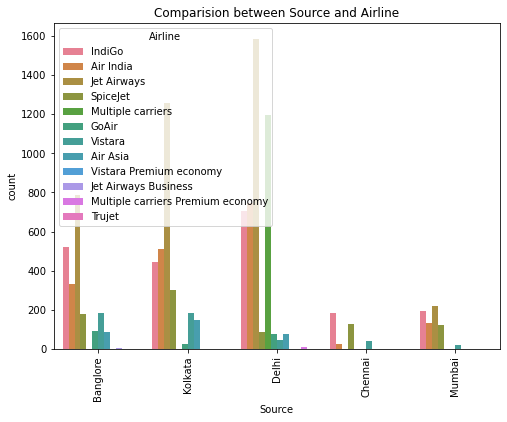

In [102]:
#Comparision between features using count plot

plt.figure(figsize=[8,6])
plt.title('Comparision between Source and Airline')
sns.countplot(x="Source",hue="Airline",data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()


all airways is famous only chennai is not famous 

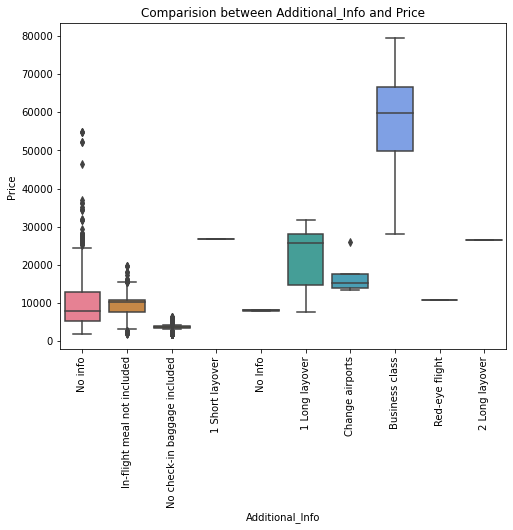

In [103]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Additional_Info and Price')
sns.boxplot(df['Additional_Info'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

we are getting , that the bussiness class has vey high price , but baggages has vary low 

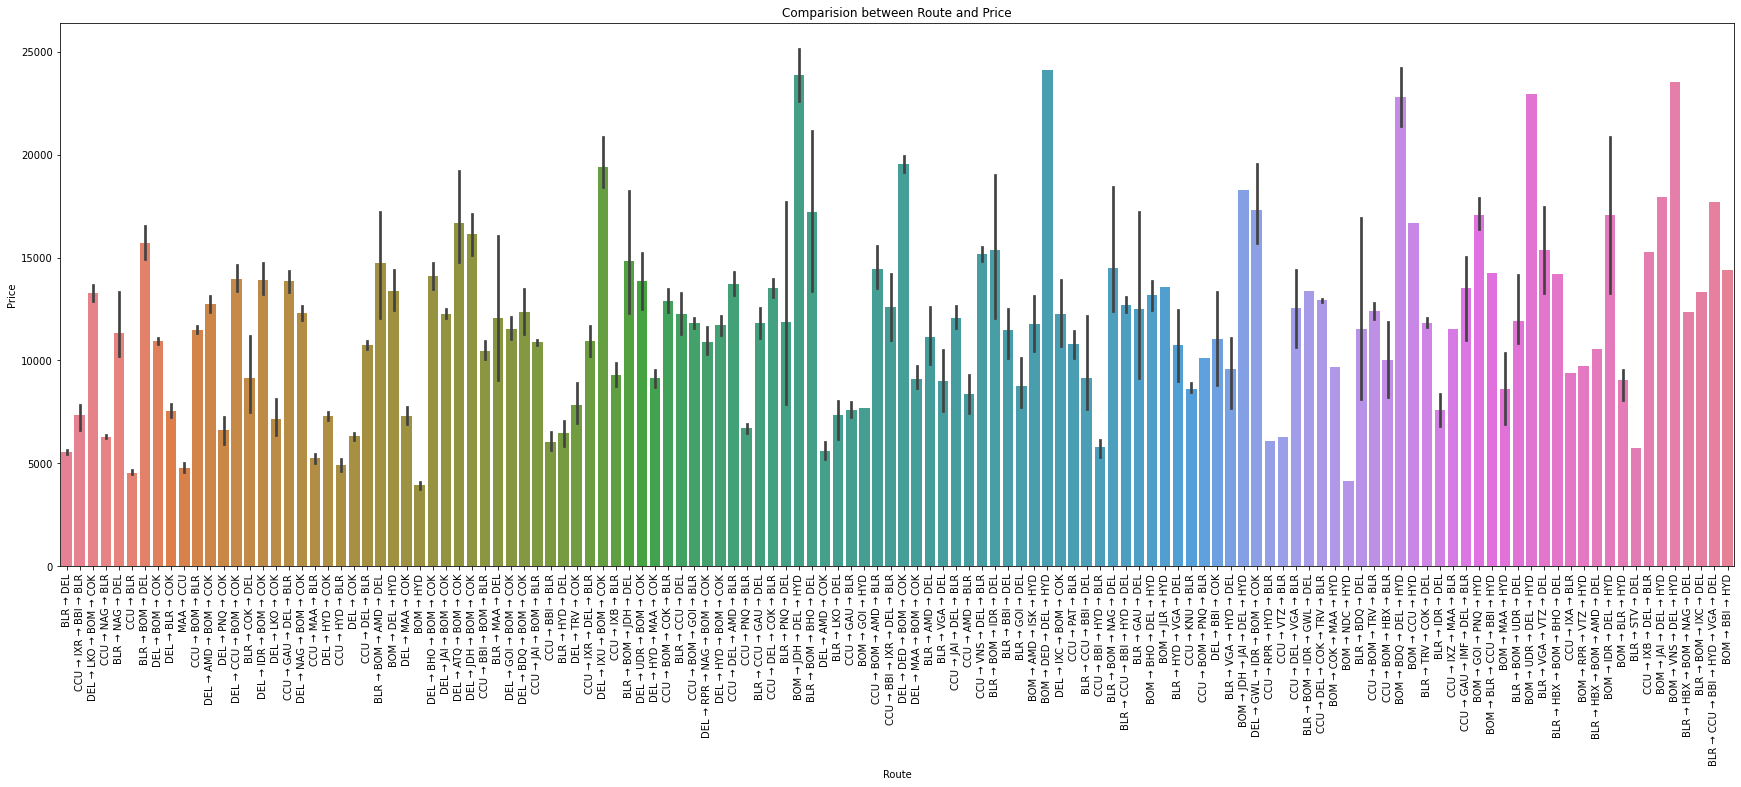

In [104]:
#Comparision between features using box plot
plt.figure(figsize=[30,10])
plt.title('Comparision between Route and Price')
sns.barplot(df['Route'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

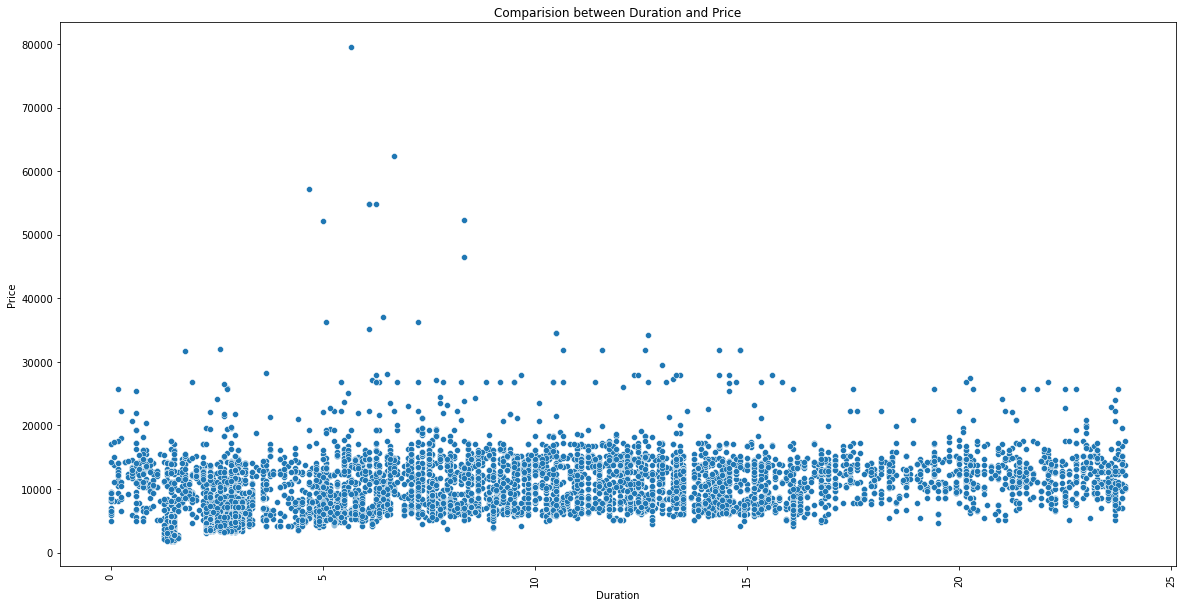

In [105]:
#Comparision between features using scatter plot
plt.figure(figsize=[20,10])
plt.title('Comparision between Duration and Price')
sns.scatterplot(df['Duration'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()


we are getting that , almost all price is same.

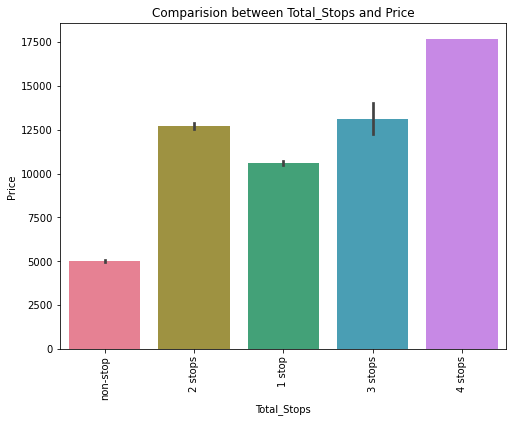

In [106]:
#Comparision between features using box plot

plt.figure(figsize=[8,6])
plt.title('Comparision between Total_Stops and Price')
sns.barplot(df['Total_Stops'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

here we are getting ,  that non stop flight price is very high

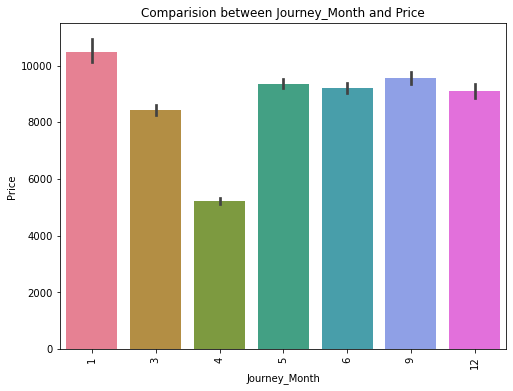

In [107]:
#Comparision between features using box plot

plt.figure(figsize=[8,6])
plt.title('Comparision between Journey_Month and Price')
sns.barplot(df['Journey_Month'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

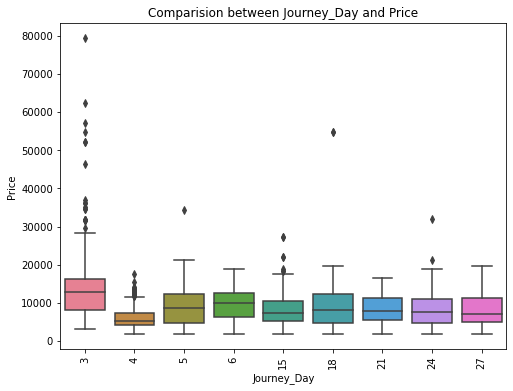

In [108]:
#Comparision between features using box plot

plt.figure(figsize=[8,6])
plt.title('Comparision between Journey_Day and Price')
sns.boxplot(df['Journey_Day'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

In 3rd day of each month the price is high which means it may be max weekends.And in 4th the price is low,except these two all other days the price is constant.

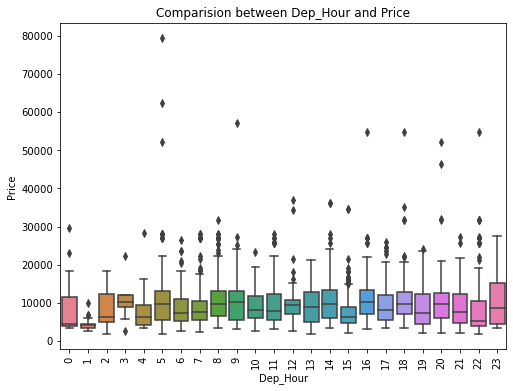

In [109]:
#Comparision between features using box plot

plt.figure(figsize=[8,6])
plt.title('Comparision between Dep_Hour and Price')
sns.boxplot(df['Dep_Hour'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

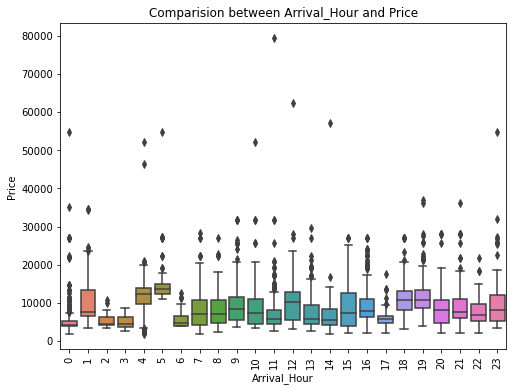

In [110]:
#Comparision between features using box plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Arrival_Hour and Price')
sns.boxplot(df['Arrival_Hour'],df['Price'],data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()


Arrival_Hour has no proper relation with price.

# checking for outliers

<AxesSubplot:>

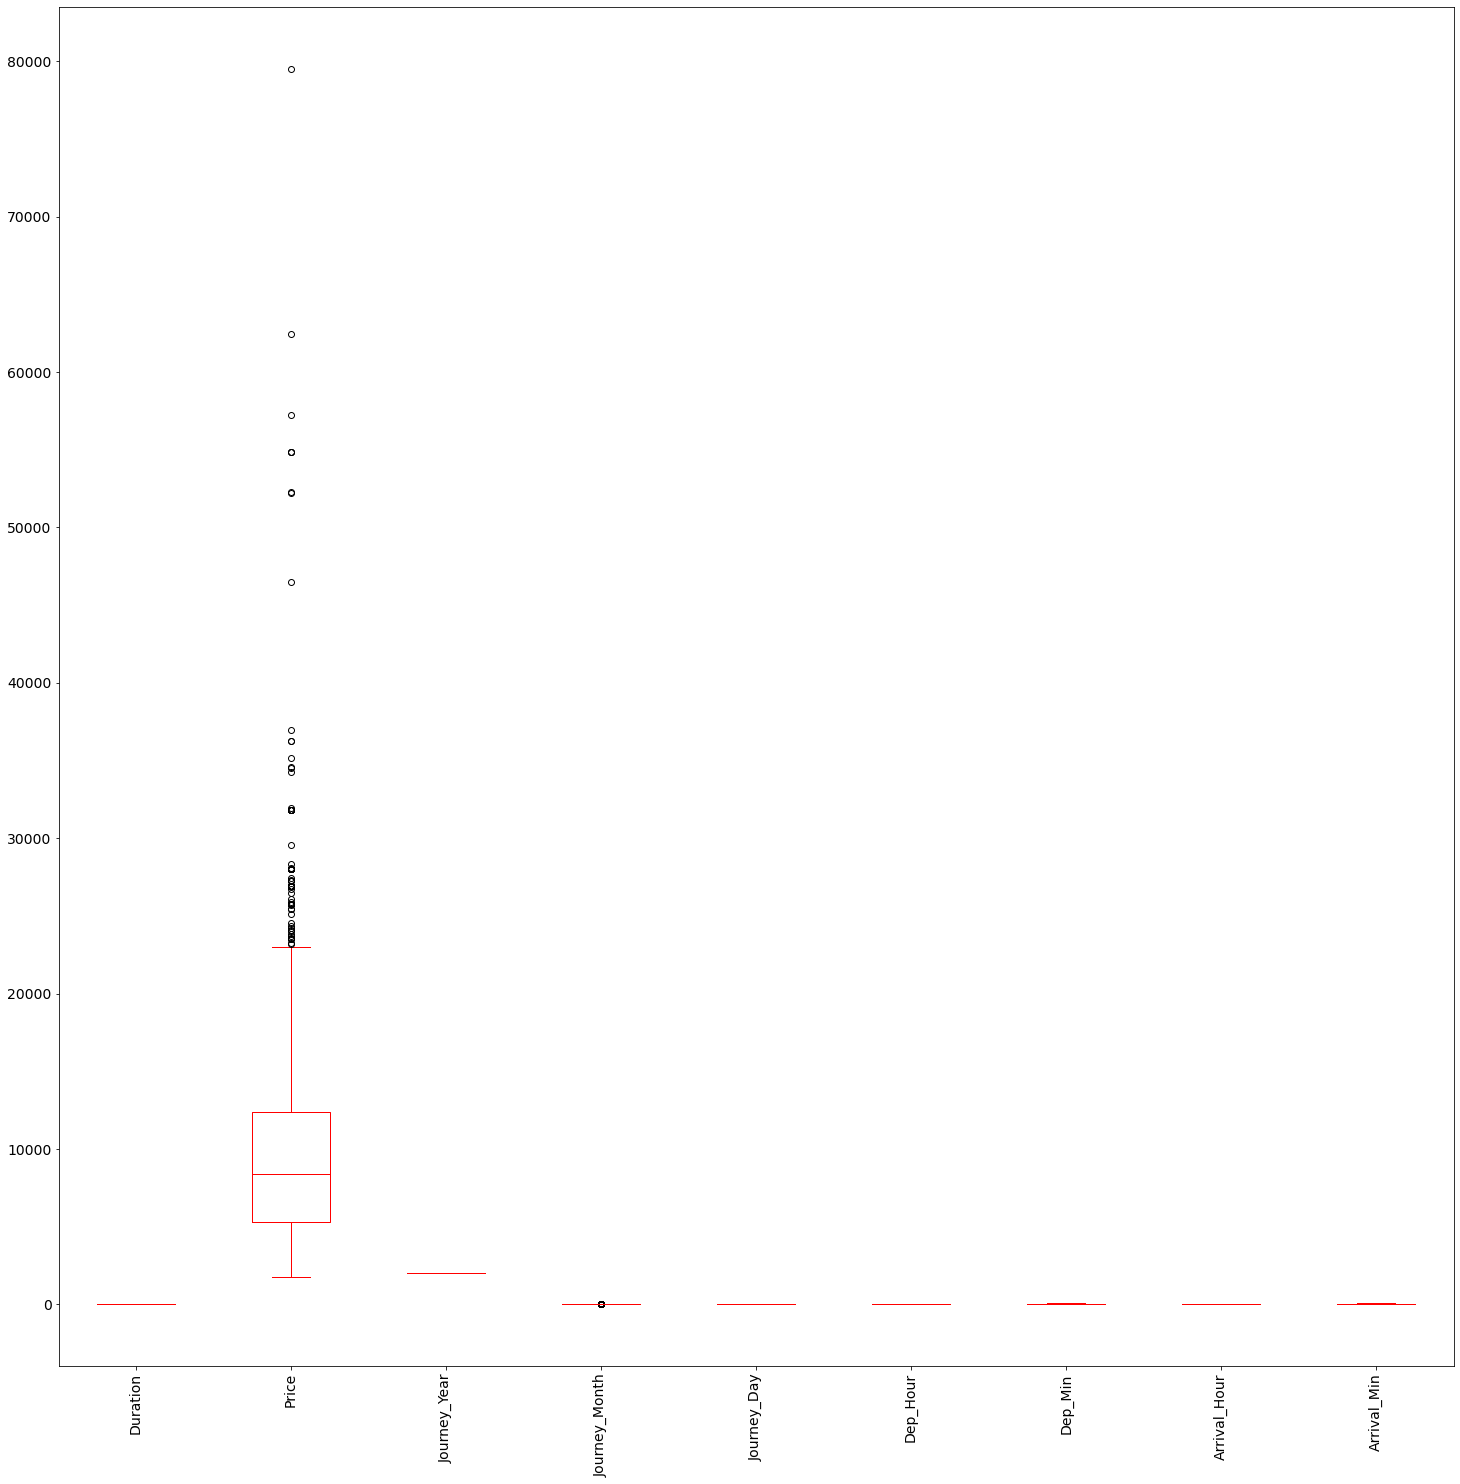

In [112]:
#Checking for outliers using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='r')

we have outliers in price , and journey_year .

# Removing outliers:
    zscore method

In [113]:
#Features having outliers
features=df[['Journey_Month']]

In [114]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2.833333,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7.416667,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19.000000,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5.416667,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4.750000,1 stop,No info,13302,2019,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2.500000,non-stop,No info,4107,2019,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2.583333,non-stop,No info,4145,2019,4,27,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3.000000,non-stop,No info,7229,2019,4,27,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2.666667,non-stop,No info,12648,2019,1,3,11,30,14,10


In [115]:
#Checking shape of new dataset
df_new.shape

(10683, 15)

In [116]:
#Checking shape of old dataset
df.shape

(10683, 15)

In [117]:
dataloss = (((10683-10683)/10683)*100)

In [118]:
dataloss

0.0

here we get only 0 , so it is not perfect 

# IQR method:

In [119]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [120]:
# checking the shape

df_1.shape

(9726, 15)

In [121]:
df.shape

(10683, 15)

In [122]:
dataloss = (((10683-9726)/10683)*100)

In [123]:
dataloss

8.958157820836844

# checking for skewness

In [124]:
#Checking for skewness
df_1.skew()

Duration         0.851356
Price            1.892394
Journey_Year     0.000000
Journey_Month    0.179871
Journey_Day      0.205870
Dep_Hour         0.123756
Dep_Min          0.177822
Arrival_Hour    -0.374118
Arrival_Min      0.111059
dtype: float64

There is skewness in Duration and Price.Since Price is my target i should not remove skewness in that column since i don't want my target to get manupulated.

# removing skewness for yeo - johnson method

In [125]:
#Creating a list of skewed features
fea=["Duration"]

In [126]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [127]:
df_1[fea] = scaler.fit_transform(df_1[fea].values)

In [128]:
#Checking skewness again
df_1[fea].skew()

Duration    0.000721
dtype: float64

<AxesSubplot:xlabel='Duration', ylabel='Density'>

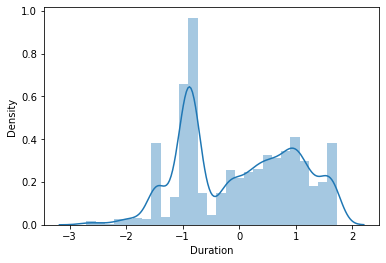

In [129]:
sns.distplot(df_1['Duration'])

skewness is removed

In [130]:
# Separating categorical columns in df_1
cat_col=[]
for i in df_1.dtypes.index:
    if df_1.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [131]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_1[cat_col]= df_1[cat_col].apply(LE.fit_transform)

In [132]:
df_1[cat_col].head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,3,0,5,16,4,8
1,1,3,0,78,1,8
2,4,2,1,112,1,8
4,3,0,5,27,0,8
5,8,3,0,58,4,8


In [133]:
cor=df_1.corr()

In [136]:
cor

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.012047,0.023282,0.022648,-0.066284,0.040999,-0.060773,-0.039647,NaN,0.003331,0.028546,-0.037285,-0.057318,-0.010600,-0.071544
Source,-0.012047,1.000000,-0.589065,0.385694,0.067225,-0.221031,-0.024049,0.010360,NaN,0.071145,0.009863,0.064645,-0.045119,0.023022,0.018436
Destination,0.023282,-0.589065,1.000000,-0.440932,-0.272353,0.351163,0.025497,-0.077241,NaN,-0.141197,-0.051904,-0.081100,0.111517,-0.041673,0.020492
Route,0.022648,0.385694,-0.440932,1.000000,0.338264,-0.453097,0.034397,0.170346,NaN,0.131410,0.076424,-0.074617,-0.054603,0.016679,-0.177685
Duration,-0.066284,0.067225,-0.272353,0.338264,1.000000,-0.672052,-0.133384,0.474787,NaN,0.064575,-0.022784,-0.031530,-0.041839,0.011640,-0.151809
Total_Stops,0.040999,-0.221031,0.351163,-0.453097,-0.672052,1.000000,0.160205,-0.564336,NaN,-0.064477,0.044106,0.048151,0.055810,-0.096247,0.178254
Additional_Info,-0.060773,-0.024049,0.025497,0.034397,-0.133384,0.160205,1.000000,-0.069314,NaN,-0.001175,-0.024207,-0.041966,-0.014637,0.029321,0.037522
Price,-0.039647,0.010360,-0.077241,0.170346,0.474787,-0.564336,-0.069314,1.000000,NaN,0.013499,-0.175841,0.007035,-0.030633,0.021683,-0.083728
Journey_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Journey_Month,0.003331,0.071145,-0.141197,0.131410,0.064575,-0.064477,-0.001175,0.013499,NaN,1.000000,-0.117084,0.015338,-0.027075,-0.012621,-0.046453


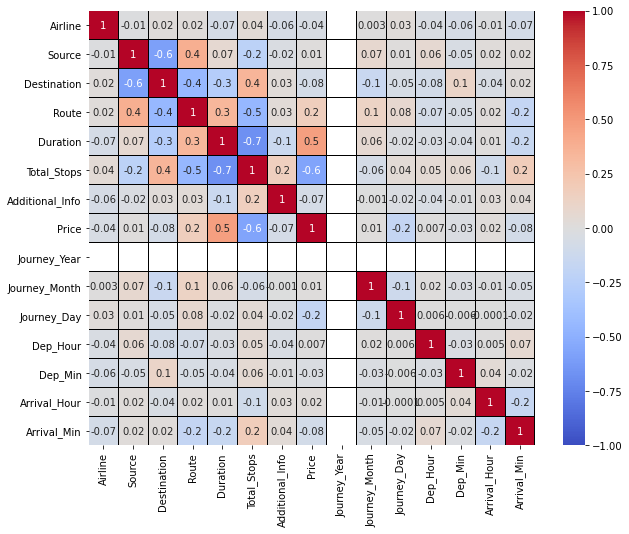

In [137]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,8))
sns.heatmap(df_1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

There is no multicolinearity issue in any features.
With target Duration and total stops is higly correlated.
Dep_Hour is very less correlated with target.

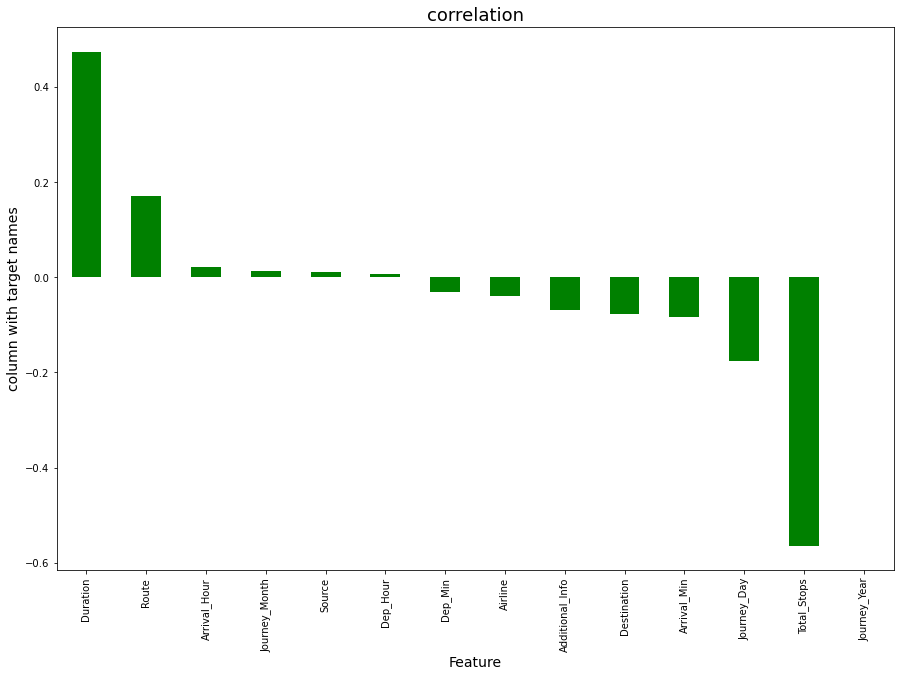

In [138]:
plt.figure(figsize=(15,10))
df_1.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

# Test Dataset:

In [147]:
dfa.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [148]:
# checking the shape of test data 

dfa.shape

(2671, 10)

we have 2671 rows and 10 columns in the test dataset

In [149]:
# data types of test dataset

dfa.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

all are object types

In [150]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


again we got the types of data and size , there is not null values

In [152]:
# checking the unique values in test dataset

dfa.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

we got the unique values

In [153]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.

for i in dfa.columns:
        print(dfa[i].value_counts())

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
24/03/2019     78
1/04/2019      78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/05/2019     65
27/03/2019     65
3/03/2019      62
1/05/2019      62
9/03/2019      55
12/03/2019     43
18/03/2019     41
01/03/2019     34
15/03/2019     33
06/03/2019     28

In [154]:
# chechking the null values 

dfa.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

there is not any null values

In [155]:
#Converting specific columns into object data type to datetime 

dfa['Date_of_Journey'] =  pd.to_datetime(dfa['Date_of_Journey'])
dfa['Dep_Time'] =  pd.to_datetime(dfa['Dep_Time'])
dfa['Arrival_Time'] =  pd.to_datetime(dfa['Arrival_Time'])

In [156]:
# now rechecking the data types of columns

dfa.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

now columns has chdnged into datetime types

In [158]:
#Extracting journey year,month and day from Date_of_journey

#Extracting year
dfa["Journey_Year"]=pd.to_datetime(dfa.Date_of_Journey, format="%d/%m/%Y").dt.year

#Extracting month
dfa["Journey_Month"]=pd.to_datetime(dfa.Date_of_Journey, format="%d/%m/%Y").dt.month

#Extracting day
dfa["Journey_Day"]=pd.to_datetime(dfa.Date_of_Journey, format="%d/%m/%Y").dt.day

In [160]:
#Droping Date_of_journey column after extraction

dfa = dfa.drop(["Date_of_Journey"],axis=1)

In [161]:
#Extracting Duration column using Arrival_Time and Dep_Time
Difference = (dfa["Arrival_Time"]-dfa["Dep_Time"])
Difference_list = list()
for i in range(len(Difference)):
    duration = Difference.iloc[i].seconds/3600
    Difference_list.append(duration)
dfa["Duration"] = Difference_list

In [162]:
#Extracting hours and minutes from Dep_time

#Extracting Hours
dfa["Dep_Hour"]=pd.to_datetime(dfa["Dep_Time"]).dt.hour

#Extracting Hours
dfa["Dep_Min"]=pd.to_datetime(dfa["Dep_Time"]).dt.minute

In [163]:
#Droping Dep_Time column after extraction
dfa = dfa.drop(["Dep_Time"],axis=1)

In [164]:
#Extracting hours and minutes from Arrival_Time

#Extracting Hours
dfa["Arrival_Hour"]=pd.to_datetime(dfa["Arrival_Time"]).dt.hour

#Extracting Hours
dfa["Arrival_Min"]=pd.to_datetime(dfa["Arrival_Time"]).dt.minute

In [165]:
#Droping Arrival_Time column after extraction
dfa = dfa.drop(["Arrival_Time"],axis=1)

In [166]:
#Printing the dataset after extraction

dfa.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Year,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10.916667,1 stop,No info,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4.000000,1 stop,No info,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23.750000,1 stop,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13.000000,1 stop,No info,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2.833333,non-stop,No info,2019,6,24,23,55,2,45


In [168]:
#Lets check the value counts now

for i in dfa.columns:
        print(dfa[i].value_counts())

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
DEL → BOM → COK          624
BLR → DEL                389
CCU → BOM → BLR          253
CCU → BLR                172
BOM → HYD                164
                        ... 
BLR → GOI → DEL            1
BLR → BDQ → DEL            1
CCU → BBI → HYD → BLR      1
CCU → PA

In [169]:
#Droping unnecessary column

dfa = dfa.drop(["Journey_Year"],axis=1)

In [171]:
#Grouping Airlines column
dfa["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)

dfa["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)

dfa["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

In [173]:
#Grouping Destination column
dfa["Destination"].replace("New Delhi","Delhi",inplace=True)

In [175]:
#Grouping Additional_Info column

dfa["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)

dfa["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)

dfa["Additional_Info"].replace("No Info","No info",inplace=True)

In [176]:
#Let me assign values for Total_Stops column

dfa.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4},inplace = True)

In [177]:
#Printing the dataset

dfa.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10.916667,1,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4.000000,1,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23.750000,1,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13.000000,1,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2.833333,0,No info,6,24,23,55,2,45


# Checking for outliers:

<AxesSubplot:>

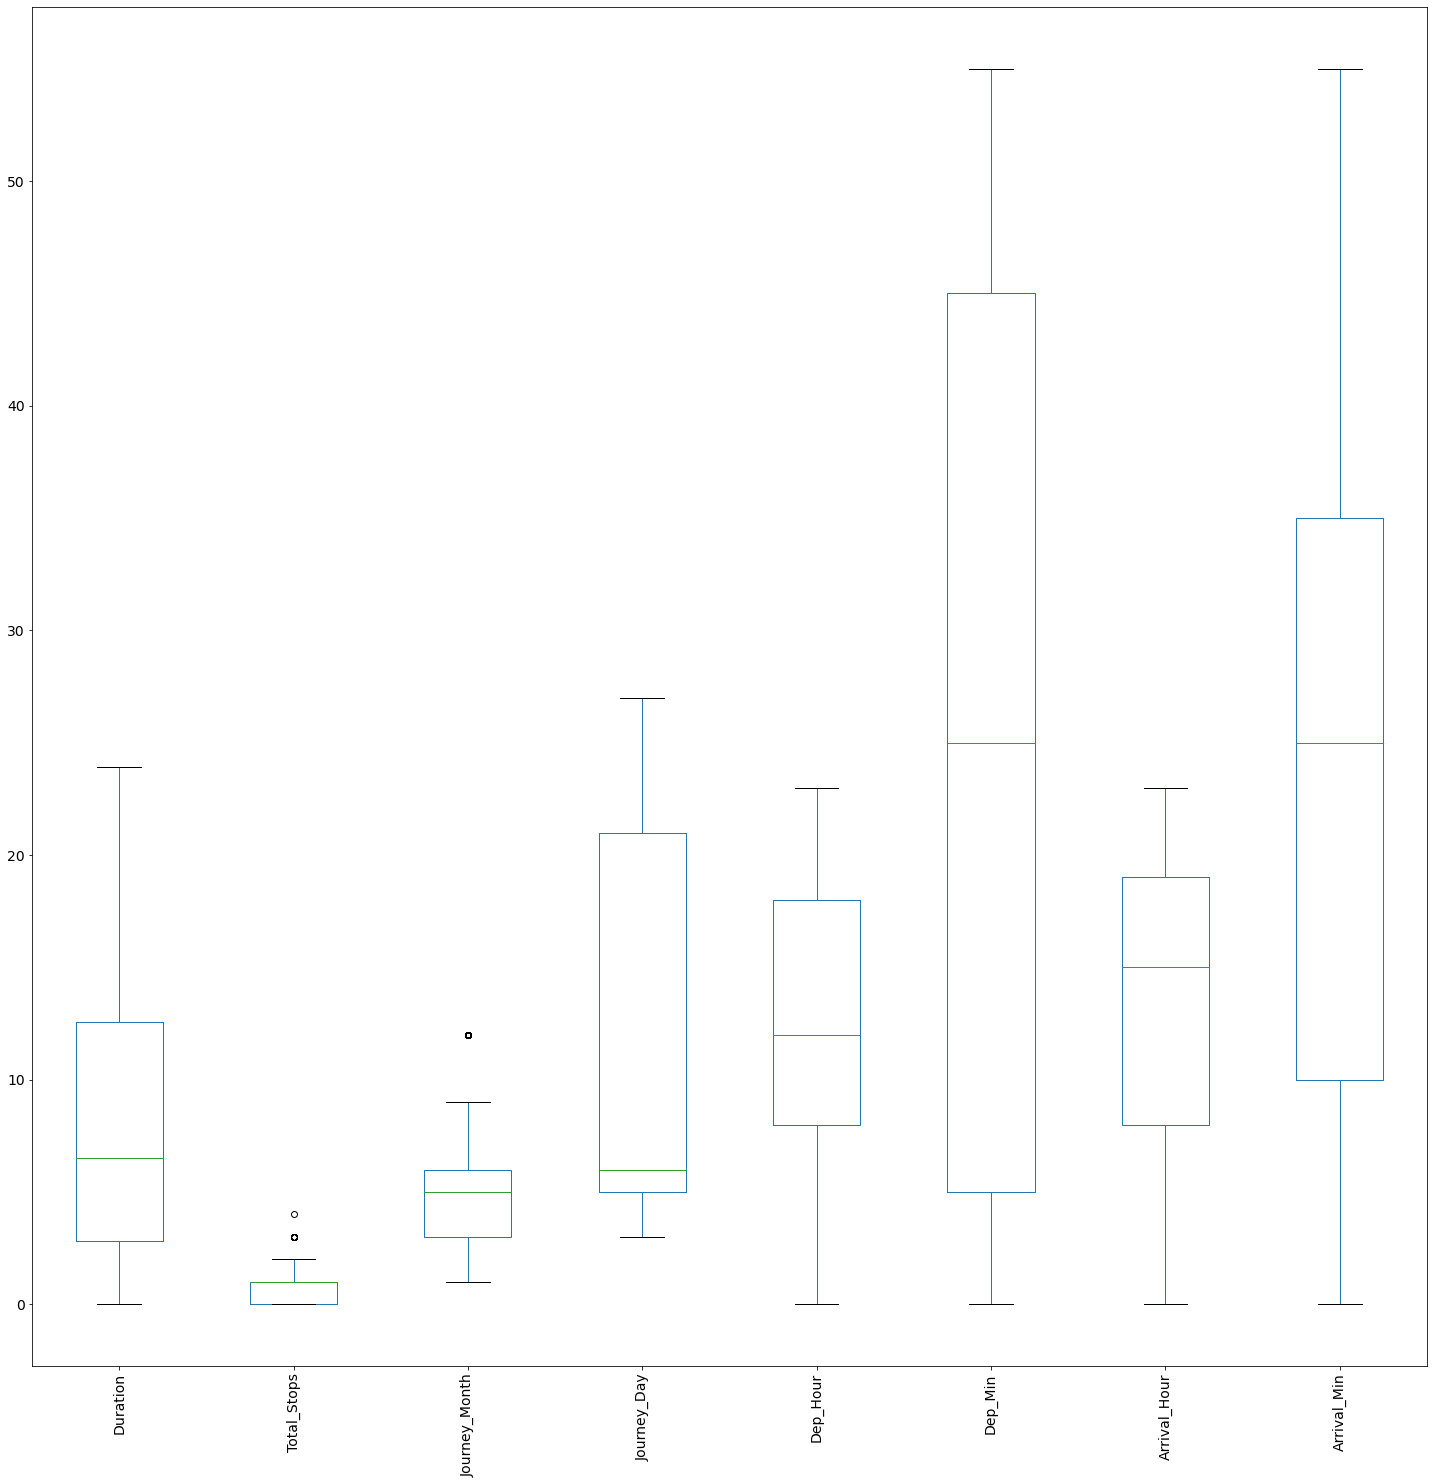

In [178]:
#Checking for outliers using boxplot

dfa.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25))

There are outliers in

Total_Stops
Journey_Month
Since Total_Stops is a categorical column So i should not remove outliers here

# Removing Outliers :

In [186]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

dfa_1=dfa[~((dfa < (Q1 - 1.5 * IQR)) |(dfa > (Q3 + 1.5 * IQR))).any(axis=1)]

In [187]:
#Checking shape of new dataset
dfa_1.shape

(2414, 13)

In [188]:
dfa.shape

(2671, 13)

In [189]:
#Checking dataloss in IQR method

dataloss = (((2671-2414)/2671)*100)
dataloss

9.621864470235867

In [190]:
#Checking for skewness

dfa_1.skew()

Duration         0.812134
Total_Stops      0.327634
Journey_Month    0.156564
Journey_Day      0.310730
Dep_Hour         0.107732
Dep_Min          0.126943
Arrival_Hour    -0.444721
Arrival_Min      0.096564
dtype: float64

# Removing skewness for yeo johnson Method :

In [191]:
#Creating a list of skewed features

fe=["Duration"]

In [192]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [193]:
dfa_1[fe] = scaler.fit_transform(dff_1[fe].values)

In [194]:
#Checking skewness again
dfa_1[fe].skew()

Duration   -0.01338
dtype: float64

In [196]:
# Separating categorical columns in dff_1
cat_col=[]
for i in dfa_1.dtypes.index:
    if dfa_1.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']


In [198]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
dfa_1[cat_col]= dfa_1[cat_col].apply(LE.fit_transform)

In [199]:
dff_1[cat_col].head()

,Airline,Source,Destination,Route,Additional_Info
0,4,2,1,70,5
2,4,2,1,70,2
3,5,2,1,70,5
4,0,0,2,14,5
7,3,3,0,52,5


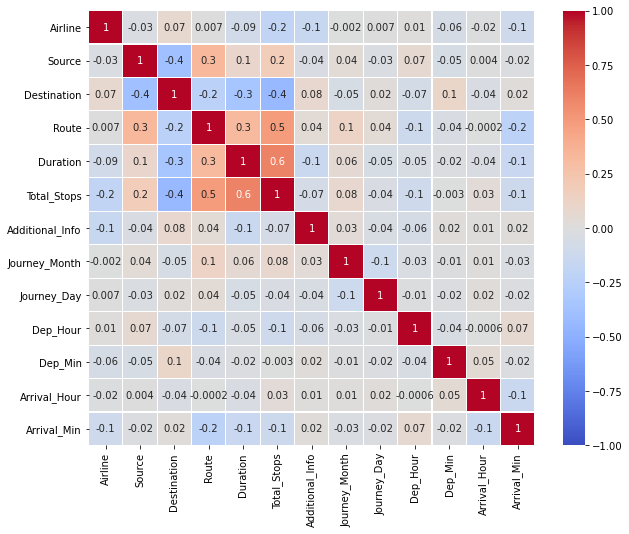

In [200]:
# Visualizing the correlation matrix by plotting heat map.

plt.figure(figsize=(10,8))
sns.heatmap(dff_1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True,annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

# Scalling the dataset using standardscaler

In [202]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_1 = pd.DataFrame(scaler.fit_transform(dfa_1), columns=dfa_1.columns)

In [203]:
X_1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,0.243561,0.042047,-0.184755,0.784578,0.679728,0.258811,0.463204,0.460712,-0.778303,0.787794,0.270961,-1.357442,0.016725
1,0.243561,0.042047,-0.184755,0.784578,1.735062,0.258811,-2.246426,0.031473,0.948874,1.140228,-0.512706,0.768368,-1.467637
2,0.825697,0.042047,-0.184755,0.784578,0.909146,0.258811,0.463204,0.031473,0.948874,-0.798160,-1.296373,1.051809,-1.467637
3,-2.084982,-1.649655,0.845266,-1.413788,-0.885227,-1.228737,0.463204,0.460712,1.294310,1.845097,1.577073,-1.640883,1.204215
4,-0.338574,0.887898,-1.214777,0.077960,-0.221330,0.258811,0.463204,-1.685484,-0.893448,0.435360,-0.512706,0.910089,0.313598


# seprating label and features in dataset

In [204]:
x = df_1.drop("Price",axis=1)
y = df_1["Price"]

# scalling dataset using standard scaller

In [205]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [206]:
x.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Year,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,5,16,-0.848535,4,8,2019,3,24,22,20,1,10
1,1,3,0,78,0.232876,1,8,2019,1,5,5,50,13,15
2,4,2,1,112,1.420381,1,8,2019,9,6,9,25,4,25
4,3,0,5,27,-0.290740,0,8,2019,1,3,16,50,21,35
5,8,3,0,58,-1.006944,4,8,2019,6,24,9,0,11,25


# Finding best accuracuy state and accuracy 

In [207]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [208]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9270631811019114  on Random_state  141


i got 92 % accuracy

In [209]:
 X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

# Regression algorithm :

In [211]:
#importing necessary libraries

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

# Random Forest Regressor:

In [212]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9267304940385165
mean_squared_error: 1504186.409206491
mean_absolute_error: 645.9824569244536
root_mean_squared_error: 1226.452774959758


# Extra tree regressor

In [213]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.9184237131079549
mean_squared_error: 1674720.4781351772
mean_absolute_error: 633.3974714416267
root_mean_squared_error: 1294.1099173312818


# Gradient Boosting Regressor

In [214]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8412948002882067
mean_squared_error: 3258138.5849984223
mean_absolute_error: 1269.8925610783958
root_mean_squared_error: 1805.031463714254


# Decisison Tree Regeressor

In [215]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.8676573632497594
mean_squared_error: 2716928.3175310334
mean_absolute_error: 697.07813570939
root_mean_squared_error: 1648.3107466527765


# KNN

In [216]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))


R2_score: 0.6922423655472325
mean_squared_error: 6318110.720123372
mean_absolute_error: 1499.842426319397
root_mean_squared_error: 2513.5852323172517


# Cross Validdation Score

In [217]:
print(cross_val_score(RFR,X,y,cv=5).mean())

0.8833525624900034


In [218]:
print(cross_val_score(knn,X,y,cv=5).mean())

0.7038230188465873


In [219]:
print(cross_val_score(ETR,X,y,cv=5).mean())

0.8890421974579656


In [220]:
print(cross_val_score(GBR,X,y,cv=5).mean())

0.821147241275845


In [221]:
print(cross_val_score(DTR,X,y,cv=5).mean())

0.7924204020160724


# here we got the Random forest regressor 89 % has the maximum score so we will use this

# HYper Tunning Parameter:

In [238]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [239]:
parameter = {'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt"]}

In [240]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [241]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300, 400]})

In [242]:
GCV.best_params_

{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 400}

In [247]:
Best_mod=RandomForestRegressor(max_depth=6,n_estimators=100,n_jobs=-2)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 82.51021907369454
mean_squared_error: 3590564.7819131156
mean_absolute_error: 1306.8777303623465
RMSE value: 1894.8785665348362


i got 82.5 % accuracy score which is good

# Saving the model :

In [248]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"Flight_Price.pkl")

['Flight_Price.pkl']

here i saved my model

# THANK YOU